Обязательная часть

Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 13,5

In [ ]:
from google.colab import files
files.upload()

1. Первичный анализ данных


In [ ]:
df2019 = pd.read_csv('2019.csv')

In [ ]:
df2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
df2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [ ]:
df2019.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


В таблице представлены данные об уровне счастья и факторах, влияющих на него, в разных регионах мира. Данные были собраны в рамках опроса Gallup World Poll. 

Столбцы#
1. Overall rank - общий рейтинг стран
2. Country or region - название страны или региона
3. Score - индекс счастья, основанный на ответе на вопрос, изветный как Сantril ladder: "Представьте себе лестницу, на вершине которой ваша возможная лучшая жизнь - это 10, а наихудшая - 0, и оцените свою жизнь по этой шкале". 
4. GDP per capita - ВВП на душу населения 
5. Social support - социальная поддержка. Средний национальный ответ на вопрос  Gallup World Poll «Если бы у вас была проблема, могли бы вы рассчитывать на помощь родственников или друзей в случае необходимости?»
6. Healthy life expectancy - ожидаемая продолжительность здоровой жизни. 
Среднее количество «здоровых» лет жизни ребенка при рождении. Основан на данных World Health Organization’s
7. Freedom to make life choices - свобода жизненного выбора. Средний национальный ответ на вопрос (0 или 1) Gallup World Poll : «Вы удовлетворены или не удовлетворены свободой выбора того, что вы делаете со своей жизнью?» 
8. Generosity - щедрость.  «Тратили ли вы на благотворительность деньги в прошлом месяце?»
9. Perceptions of corruption - восприятие коррупции.  Средний национальный ответ на вопрос (0 или 1) Gallup World Poll : «Распространена ли коррупция в правительстве или нет?» и «Распространена ли коррупция в бизнесе или нет?»





Считаю, что данных за 2019 год недостаточно, чтобы провести адекватный анализ показателей. Соберем данные с 2015 - 2019 гг в один файл для дальнейшего анализа. По столбцам возьмем эталонный - 2019 г.

In [ ]:
# Загружаем данные в Pandas 
df2015 = pd.read_csv('2015.csv')
df2016 = pd.read_csv('2016.csv')
df2017 = pd.read_csv('2017.csv')
df2018 = pd.read_csv('2018.csv')
df2019 = pd.read_csv('2019.csv')


In [ ]:
# Добавляем в каждый df столбец year с указанием года, которому относятся данные
df2015['year'] = '2015'
df2016['year'] = '2016'
df2017['year'] = '2017'
df2018['year'] = '2018'
df2019['year'] = '2019'

pd.to_datetime(df2015.year)
pd.to_datetime(df2016.year)
pd.to_datetime(df2017.year)
pd.to_datetime(df2018.year)
pd.to_datetime(df2019.year)

0     2019-01-01
1     2019-01-01
2     2019-01-01
3     2019-01-01
4     2019-01-01
         ...    
151   2019-01-01
152   2019-01-01
153   2019-01-01
154   2019-01-01
155   2019-01-01
Name: year, Length: 156, dtype: datetime64[ns]

In [ ]:
df2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
 9   year                          156 non-null    object 
dtypes: float64(7), int64(1), object(2)
memory usage: 12.3+ KB


In [ ]:
# Необходимо определить колонки, которые нужно удалить из df, чтобы привести данные к эталонному 2019 г (исходя из описания на сайте можно сопоставить столбцы с разными названиями)
df2015.head()


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [ ]:
df2015.drop(['Region', 'Standard Error', 'Dystopia Residual'], inplace = True, axis = 1)



In [ ]:
# 2015 с нужными столбцами
df2015.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [ ]:
df2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016


In [ ]:
df2016.drop(['Region', 'Lower Confidence Interval', 'Upper Confidence Interval' ,'Dystopia Residual'], inplace = True, axis = 1)

In [ ]:
# 2016 с нужными столбцами
df2016.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,year
0,Denmark,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2016
1,Switzerland,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2016
2,Iceland,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2016
3,Norway,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2016
4,Finland,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2016


In [ ]:
df2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017


In [ ]:
df2017.drop(['Whisker.high', 'Whisker.low' ,'Dystopia.Residual'], inplace = True, axis = 1)

In [ ]:
# 2017 с нужными столбцами
df2017.head()

,Country,Happiness.Rank,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,year
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2017
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2017
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2017
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2017
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2017


In [ ]:
df2018.head() 
# Удалять ничего не нужно

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018


In [ ]:
df2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019


In [ ]:
# Упорядочим колонки в соответствии с эталонным 2019 годом
df2015 = df2015.iloc[:, [1,0,2, 3, 4, 5, 6, 8, 7, 9 ]]


In [ ]:
df2016 = df2016.iloc[:, [1, 0, 2, 3, 4, 5, 6, 8, 7, 9]]

In [ ]:
df2017 = df2017.iloc[:, [1, 0, 2, 3, 4, 5, 6, 7, 8, 9]]

In [ ]:
# Стандартизируем названия столбцов
df2015 = df2015.rename(columns = {'Happiness Rank': 'Overall rank', 'Country': 'Country or region', 'Happiness Score': 'Score', 'Economy (GDP per Capita)': 'GDP per capita', \
                        'Family': 'Social support', 'Health (Life Expectancy)': 'Healthy life expectancy', 'Freedom': 'Freedom to make life choices', \
                        'Trust (Government Corruption)': 'Perceptions of corruption'})

In [ ]:
df2016 = df2016.rename(columns = {'Happiness Rank': 'Overall rank', 'Country': 'Country or region', 'Happiness Score': 'Score', 'Economy (GDP per Capita)': 'GDP per capita', \
                        'Family': 'Social support', 'Health (Life Expectancy)': 'Healthy life expectancy', 'Freedom': 'Freedom to make life choices', \
                        'Trust (Government Corruption)': 'Perceptions of corruption'})

In [ ]:
df2017 = df2017.rename(columns = {'Happiness.Rank': 'Overall rank', 'Country': 'Country or region', 'Happiness.Score': 'Score', 'Economy..GDP.per.Capita.': 'GDP per capita', \
                        'Family': 'Social support', 'Health..Life.Expectancy.': 'Healthy life expectancy', 'Freedom': 'Freedom to make life choices', \
                        'Trust..Government.Corruption.': 'Perceptions of corruption'})

In [ ]:
# Конкатинируем таблицы
df = pd.concat([df2015, df2016, df2017, df2018, df2019])

In [ ]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,1,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,2,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,3,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,4,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,5,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015


In [ ]:
# Формат данных корректный, позволяет проводить исследования
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  782 non-null    int64  
 1   Country or region             782 non-null    object 
 2   Score                         782 non-null    float64
 3   GDP per capita                782 non-null    float64
 4   Social support                782 non-null    float64
 5   Healthy life expectancy       782 non-null    float64
 6   Freedom to make life choices  782 non-null    float64
 7   Generosity                    782 non-null    float64
 8   Perceptions of corruption     781 non-null    float64
 9   year                          782 non-null    object 
dtypes: float64(7), int64(1), object(2)
memory usage: 67.2+ KB


In [ ]:
# Есть пустое значение в столбце Perceptions of corruption за 2018 г. Заполним его средним значением по United Arab Emirates
(df.isna().mean()*100).round(2)
df[df['Perceptions of corruption'].isnull()]
UAE_cor = df[df['Country or region'] == 'United Arab Emirates']['Perceptions of corruption'].mean()
df['Perceptions of corruption'] = df['Perceptions of corruption'].fillna(UAE_cor)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  782 non-null    int64  
 1   Country or region             782 non-null    object 
 2   Score                         782 non-null    float64
 3   GDP per capita                782 non-null    float64
 4   Social support                782 non-null    float64
 5   Healthy life expectancy       782 non-null    float64
 6   Freedom to make life choices  782 non-null    float64
 7   Generosity                    782 non-null    float64
 8   Perceptions of corruption     782 non-null    float64
 9   year                          782 non-null    object 
dtypes: float64(7), int64(1), object(2)
memory usage: 67.2+ KB


In [ ]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,78.698210,5.379018,0.916047,1.078392,0.612416,0.411091,0.218576,0.125674
std,45.182384,1.127456,0.407340,0.329548,0.248309,0.152880,0.122321,0.105959
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,4.509750,0.606500,0.869363,0.440183,0.309768,0.130000,0.054250
50%,79.000000,5.322000,0.982205,1.124735,0.647310,0.431000,0.201982,0.091033
75%,118.000000,6.189500,1.236187,1.327250,0.808000,0.531000,0.278832,0.156243
max,158.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.838075,0.551910


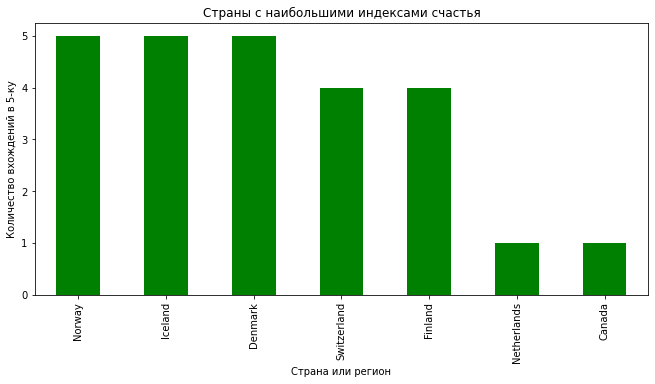

In [ ]:
# 1.Какие страны чаще остальных входят в 5-ку с наибольшим индексом счастья (топ-5) за период с 2015 - 2019 гг? 

top_5 = df.groupby('year').apply(lambda g: g.head(5))[['Country or region', 'Score']].reset_index()
top_5.drop('level_1', axis = 1, inplace = True)
top_5.groupby('Country or region')['Score'].count().sort_values(ascending = False).plot(kind = 'bar', xlabel = 'Страна или регион', ylabel = 'Количество вхождений в 5-ку', title = 'Страны с наибольшими индексами счастья', color = 'green' )

# Вывод: страны Северной Европы чаще остальных входят в топ-5 по индексу счастья за 2015-2019 гг. Всегде в топ-5 оказываются страны: Дания, Исландия, Норвегия.

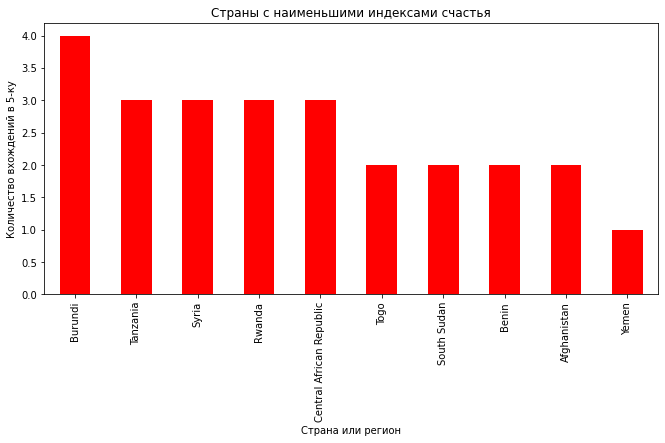

In [ ]:
# 2.Какие страны чаще остальных входят в 5-ку с наименьшим индексом счастья за период с 2015 - 2019 гг? 
min_5 = df.groupby('year').apply(lambda g: g.tail(5))[['Country or region', 'Score']].reset_index()
min_5.drop('level_1', axis = 1, inplace = True)
min_5.groupby('Country or region')['Score'].count().sort_values(ascending = False).plot(kind = 'bar', xlabel = 'Страна или регион', ylabel = 'Количество вхождений в 5-ку', title = 'Страны с наименьшими индексами счастья', color = 'red')
# Вывод: страны Африки и Ближнего Востока чаще остальных оказываются в 5-ке с ниаменьшим индексом счстья за период 2015-2019 гг. Бурунди (страна в Восточной Африке) входила в 5-ку максимальное число раз - 4.

In [ ]:
# 3.Какие страны имели максимальный и минимальный индексы счастья за период 2015-2019 гг.? Насколько сильно отличаются значения индексов счастья?
max = df.groupby('year').apply(lambda g: g[g['Score'] == g['Score'].max()])[['Score', 'Country or region']].reset_index()
min = df.groupby('year').apply(lambda g: g[g['Score'] == g['Score'].min()])[['Score', 'Country or region']].reset_index()

In [ ]:
max.drop('level_1', axis = 1, inplace = True)
min.drop('level_1', axis = 1, inplace = True)

In [ ]:
max

,year,Score,Country or region
0,2015,7.587,Switzerland
1,2016,7.526,Denmark
2,2017,7.537,Norway
3,2018,7.632,Finland
4,2019,7.769,Finland


In [ ]:
min

,year,Score,Country or region
0,2015,2.839,Togo
1,2016,2.905,Burundi
2,2017,2.693,Central African Republic
3,2018,2.905,Burundi
4,2019,2.853,South Sudan


In [ ]:
all = pd.concat([max, min])


In [ ]:
all_pivot = all.pivot_table(index= 'year', columns = 'Country or region')
all_pivot.columns = all_pivot.columns.droplevel(0)
all_pivot

Country or region,Burundi,Central African Republic,Denmark,Finland,Norway,South Sudan,Switzerland,Togo
year,,,,,,,,
2015,NaN,NaN,NaN,NaN,NaN,NaN,7.587,2.839
2016,2.905,NaN,7.526,NaN,NaN,NaN,NaN,NaN
2017,NaN,2.693,NaN,NaN,7.537,NaN,NaN,NaN
2018,2.905,NaN,NaN,7.632,NaN,NaN,NaN,NaN
2019,NaN,NaN,NaN,7.769,NaN,2.853,NaN,NaN


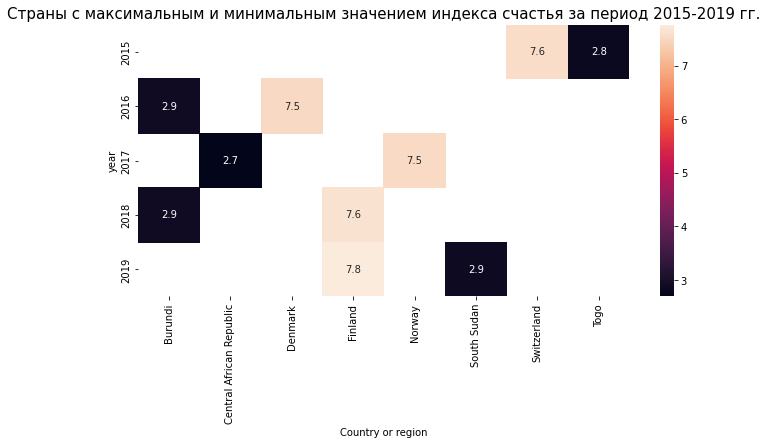

In [ ]:
sns.heatmap(all_pivot, annot = True)
# Вывод: в 2015 г. Максимальный индекс счастья у Швейцарии (7.6), минимальный у Того (2.8), в 2016 г. максимум - Дания (7.5), минимум - Бурунди (2.9) и тд. Видим, что значения отличаются сильно, более, чем в 2 раза.
plt.title('Страны с максимальным и минимальным значением индекса счастья за период 2015-2019 гг.', fontsize = 15)
plt.show()

In [ ]:
# 4.Какая связь между индексом счастья и факторами, которые пытаются его объяснить?
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,1,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,2,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,3,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,4,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,5,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015


Text(0, 0.5, 'Perceptions of corruption')

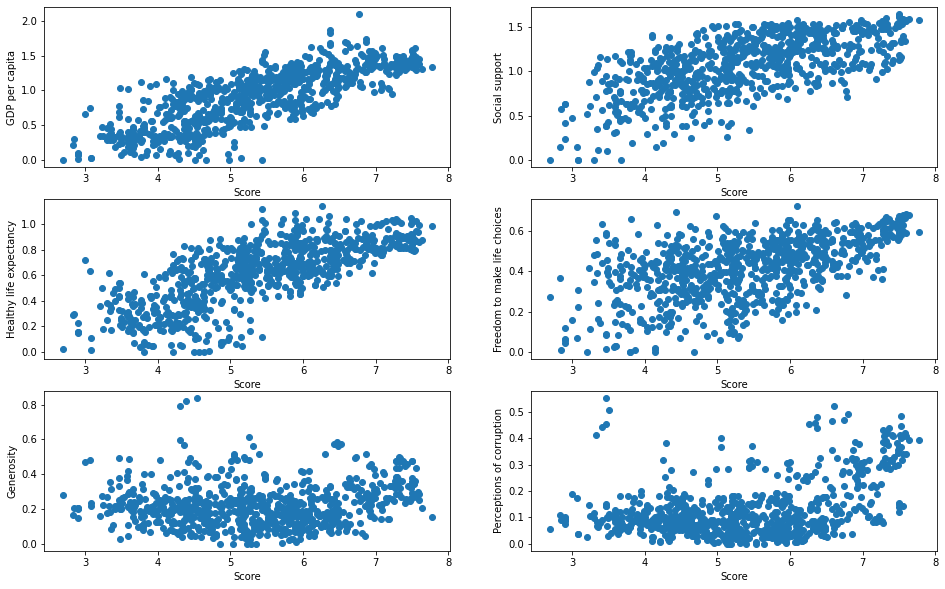

In [ ]:
fig, axs = plt.subplots(3,2, figsize = (16,10))
axs[0,0].scatter(x = df['Score'],y = df['GDP per capita'])
axs[0,0].set_xlabel('Score')
axs[0,0].set_ylabel('GDP per capita')

axs[0,1].scatter(x = df['Score'], y = df['Social support'])
axs[0,1].set_xlabel('Score')
axs[0,1].set_ylabel('Social support')

axs[1,0].scatter(x = df['Score'], y = df['Healthy life expectancy'])
axs[1,0].set_xlabel('Score')
axs[1,0].set_ylabel('Healthy life expectancy')

axs[1,1].scatter(x = df['Score'], y = df['Freedom to make life choices'])
axs[1,1].set_xlabel('Score')
axs[1,1].set_ylabel('Freedom to make life choices')

axs[2,0].scatter(x = df['Score'], y = df['Generosity'])
axs[2,0].set_xlabel('Score')
axs[2,0].set_ylabel('Generosity')

axs[2,1].scatter(x = df['Score'], y = df['Perceptions of corruption'])
axs[2,1].set_xlabel('Score')
axs[2,1].set_ylabel('Perceptions of corruption')

# Диаграммы показывают, что есть положительная корреляция между значениями Индекса счастья (Score) и всеми факторами (GDP per capita, Social support, Healthy life expectancy, Generosity,Perceptions of corruption, Freedom to make life choices  )

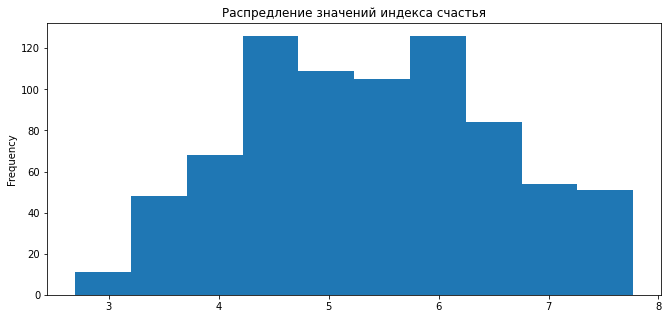

In [ ]:
# 5.Какое распределение имеет индекс счастья?
df['Score'].plot(kind = 'hist', title = 'Распредление значений индекса счастья')

# Вывод: распределение близко к нормальному, наиболее частые значения находятся в отрезке примерно [4,5: 6.3]. Это говорит о том, что большинство стран имеют индекс из этого промежутка, но также есть хвост (<3).